In [239]:
import pandas as pd

In [240]:
df = pd.read_excel('ENB2012_data.xlsx')
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


## Построим графики для наглядности

In [241]:
import matplotlib.pyplot as plt

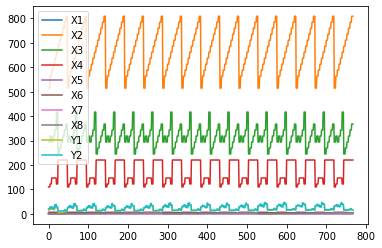

In [242]:
df.plot()

In [243]:
xs = range(len(df))

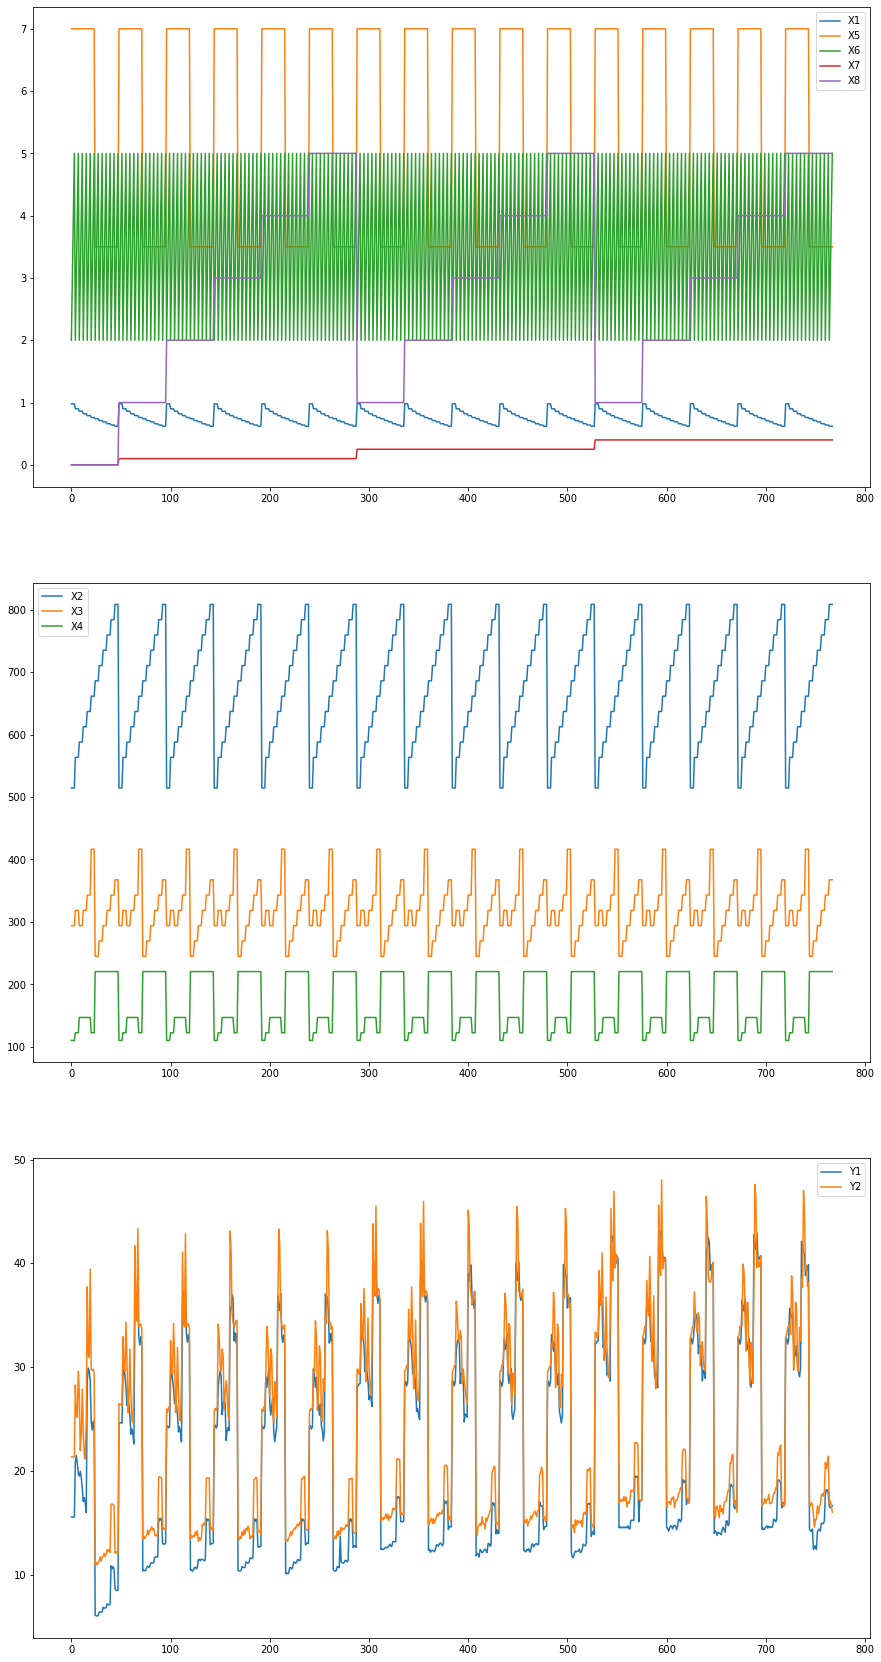

In [244]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 30))
# fig.subplot(511)
# fig.plot(xs, df['X1'].loc[:])
# fig.plot(xs, df['X7'].loc[:])
ax1.plot(xs, df['X1'].loc[:], label='X1')
ax1.plot(xs, df['X5'].loc[:], label='X5')
ax1.plot(xs, df['X6'].loc[:], label='X6')
ax1.plot(xs, df['X7'].loc[:], label='X7')
ax1.plot(xs, df['X8'].loc[:], label='X8')
ax1.legend()
ax2.plot(xs, df['X2'].loc[:], label='X2')
ax2.plot(xs, df['X3'].loc[:], label='X3')
ax2.plot(xs, df['X4'].loc[:], label='X4')
ax2.legend()
ax3.plot(xs, df['Y1'].loc[:], label='Y1')
ax3.plot(xs, df['Y2'].loc[:], label='Y2')
ax3.legend()

## Можно видеть, что у Y1, Y2, кроме периодической составляющей, есть ещё и линейная или также периодическая....

## Подготовим и нормализуем данные

In [245]:
data = [df[:].loc[i] for i in xs]
max = -1000
for elems in data:
    for elem in elems:
        if elem > max:
            max = elem
for i, _ in enumerate(data):
    data[i] = [data[i][j] / max for j, _ in enumerate(data[i])]
data[:5]

[[0.0012121212121212121,
  0.6363636363636364,
  0.36363636363636365,
  0.13636363636363635,
  0.008658008658008658,
  0.0024737167594310453,
  0.0,
  0.0,
  0.019233147804576377,
  0.026382189239332093],
 [0.0012121212121212121,
  0.6363636363636364,
  0.36363636363636365,
  0.13636363636363635,
  0.008658008658008658,
  0.0037105751391465678,
  0.0,
  0.0,
  0.019233147804576377,
  0.026382189239332093],
 [0.0012121212121212121,
  0.6363636363636364,
  0.36363636363636365,
  0.13636363636363635,
  0.008658008658008658,
  0.004947433518862091,
  0.0,
  0.0,
  0.019233147804576377,
  0.026382189239332093],
 [0.0012121212121212121,
  0.6363636363636364,
  0.36363636363636365,
  0.13636363636363635,
  0.008658008658008658,
  0.006184291898577613,
  0.0,
  0.0,
  0.019233147804576377,
  0.026382189239332093],
 [0.0011131725417439704,
  0.696969696969697,
  0.3939393939393939,
  0.15151515151515152,
  0.008658008658008658,
  0.0024737167594310453,
  0.0,
  0.0,
  0.02577612863327149,
  0.0

In [246]:
data_x = [data[i][:8] for i, _ in enumerate(data)]
data_x[:5]

[[0.0012121212121212121,
  0.6363636363636364,
  0.36363636363636365,
  0.13636363636363635,
  0.008658008658008658,
  0.0024737167594310453,
  0.0,
  0.0],
 [0.0012121212121212121,
  0.6363636363636364,
  0.36363636363636365,
  0.13636363636363635,
  0.008658008658008658,
  0.0037105751391465678,
  0.0,
  0.0],
 [0.0012121212121212121,
  0.6363636363636364,
  0.36363636363636365,
  0.13636363636363635,
  0.008658008658008658,
  0.004947433518862091,
  0.0,
  0.0],
 [0.0012121212121212121,
  0.6363636363636364,
  0.36363636363636365,
  0.13636363636363635,
  0.008658008658008658,
  0.006184291898577613,
  0.0,
  0.0],
 [0.0011131725417439704,
  0.696969696969697,
  0.3939393939393939,
  0.15151515151515152,
  0.008658008658008658,
  0.0024737167594310453,
  0.0,
  0.0]]

In [247]:
data_y = [data[i][8:] for i, _ in enumerate(data)]
data_y[:5]

[[0.019233147804576377, 0.026382189239332093],
 [0.019233147804576377, 0.026382189239332093],
 [0.019233147804576377, 0.026382189239332093],
 [0.019233147804576377, 0.026382189239332093],
 [0.02577612863327149, 0.03497835497835498]]

In [248]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3)
y_train[:5]

[[0.023920841063698205, 0.029053803339517622],
 [0.014211502782931354, 0.01670995670995671],
 [0.02401978973407545, 0.027866419294990726],
 [0.01628942486085343, 0.020272108843537414],
 [0.04023500309214595, 0.04086580086580086]]

# Линейная регрессия

In [249]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train, [y[0] for y in y_train])
y_predict1 = model1.predict(X_test)
y_train_predict1 = model1.predict(X_train)

In [250]:
model2 = LinearRegression()
model2.fit(X_train, [y[1] for y in y_train])
y_predict2 = model2.predict(X_test)
y_train_predict2 = model2.predict(X_train)

## Метрики

In [251]:
model1.score(X_test, [y[0] for y in y_test])

0.9027142877556324

In [252]:
model1.score(X_train, [y[0] for y in y_train])

0.9203962431422708

In [253]:
model2.score(X_test, [y[1] for y in y_test])

0.8542194170843592

In [254]:
model2.score(X_train, [y[1] for y in y_train])

0.9000242287791388

In [255]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print("---- Предсказание Y1 -----")
print(f'RMSE для тестовой выборки: {sqrt(mean_squared_error([y[0] for y in y_test], y_predict1))}')
print(f'RMSE для тренировочной выборки: {sqrt(mean_squared_error([y[0] for y in y_train], y_train_predict1))}')
print(f'Коэффициент детерминации для тестовой выборки: {abs(r2_score([y[0] for y in y_test], y_predict1))}')
print(f'Коэффициент детерминации для тренировочной выборки: {abs(r2_score([y[0] for y in y_train], y_train_predict1))}')
print("---- Предсказание Y2 -----")
print(f'RMSE для тестовой выборки: {sqrt(mean_squared_error([y[1] for y in y_test], y_predict2))}')
print(f'RMSE для тренировочной выборки: {sqrt(mean_squared_error([y[1] for y in y_train], y_train_predict2))}')
print(f'Коэффициент детерминации для тестовой выборки: {abs(r2_score([y[1] for y in y_test], y_predict2))}')
print(f'Коэффициент детерминации для тренировочной выборки: {abs(r2_score([y[1] for y in y_train], y_train_predict2))}')

---- Предсказание Y1 -----
RMSE для тестовой выборки: 0.003718756057391577
RMSE для тренировочной выборки: 0.0035686603993481487
Коэффициент детерминации для тестовой выборки: 0.9027142877556324
Коэффициент детерминации для тренировочной выборки: 0.9203962431422708
---- Предсказание Y2 -----
RMSE для тестовой выборки: 0.004358140567462796
RMSE для тренировочной выборки: 0.0037496374826538007
Коэффициент детерминации для тестовой выборки: 0.8542194170843592
Коэффициент детерминации для тренировочной выборки: 0.9000242287791388


## Среднеквадратическая ошибка достаточно мала, а коэффициент детерминации достаточно высок

## Построим графики

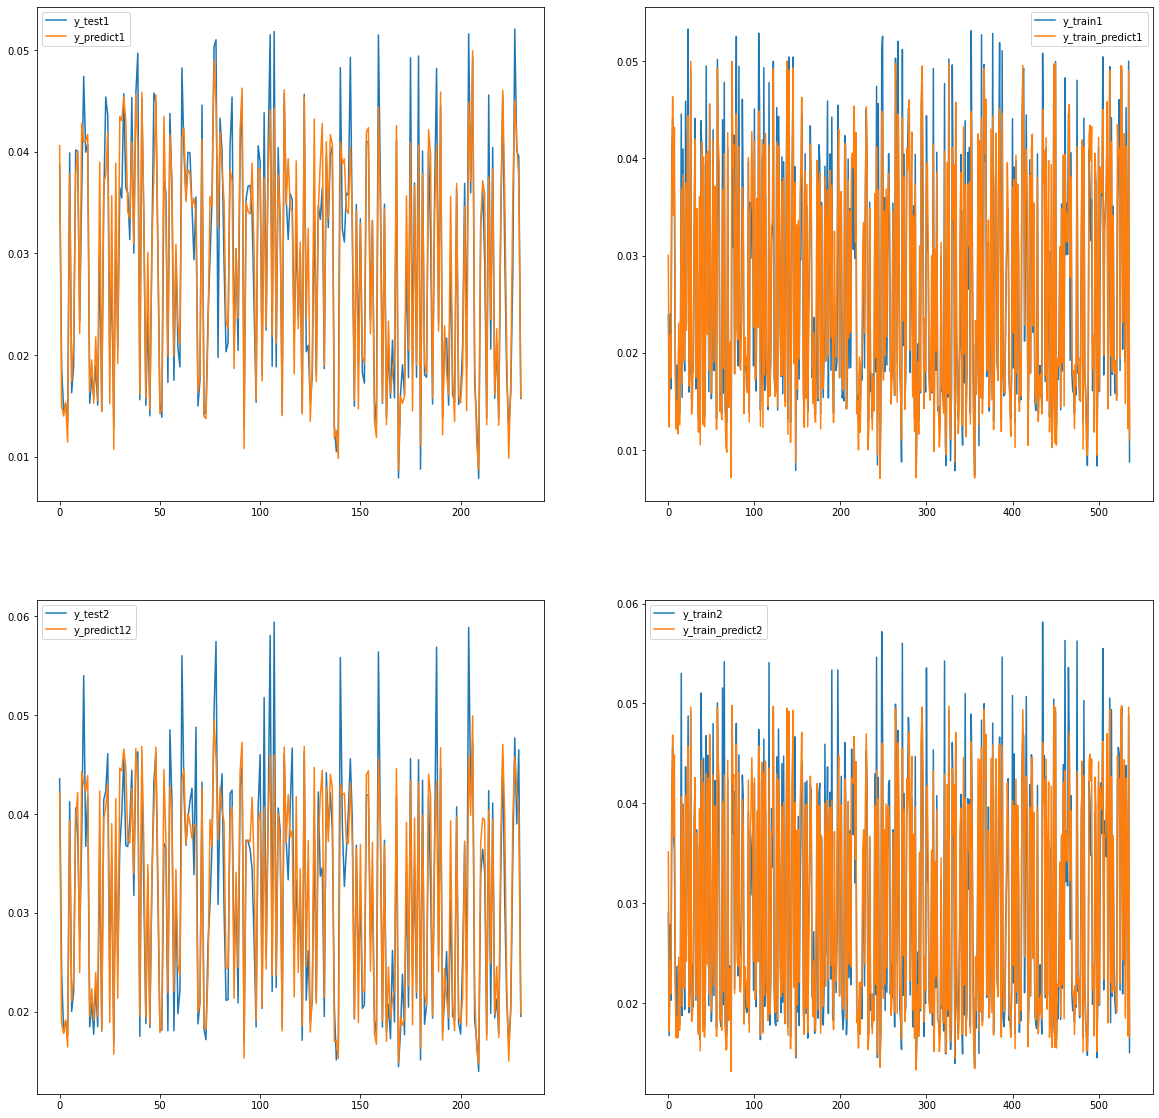

In [256]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))
ax1.plot(range(len(y_test)), [y[0] for y in y_test], label="y_test1")
ax1.plot(range(len(y_predict1)), y_predict1, label='y_predict1')
ax1.legend()
ax2.plot(range(len(y_train)), [y[0] for y in y_train], label="y_train1")
ax2.plot(range(len(y_train_predict1)), y_train_predict1, label="y_train_predict1")
ax2.legend()
ax3.plot(range(len(y_test)), [y[1] for y in y_test], label="y_test2")
ax3.plot(range(len(y_predict2)), y_predict2, label='y_predict12')
ax3.legend()
ax4.plot(range(len(y_train)), [y[1] for y in y_train], label="y_train2")
ax4.plot(range(len(y_train_predict2)), y_train_predict2, label="y_train_predict2")
ax4.legend()

## В принципе, графиик достаточно похожи

# Градиентный бустинг (model1 - предсказание Y1, model2 - предсказание Y2)

In [257]:
from sklearn.ensemble import GradientBoostingRegressor

model1 = GradientBoostingRegressor()
model1.fit(X_train, [y[0] for y in y_train])
y_predict1 = model1.predict(X_test)
y_train_predict1 = model1.predict(X_train)

In [258]:
print("---- Предсказание Y1 ----")
print(f'Score для тестовой выборки: {model1.score(X_train, [y[0] for y in y_train])}')
print(f'Score для тренировочной выборки: {model1.score(X_test, [y[0] for y in y_test])}')
print(f'RMSE для тестовой выборки: {sqrt(mean_squared_error([y[0] for y in y_test], y_predict1))}')
print(f'RMSE для тренировочной выборки: {sqrt(mean_squared_error([y[0] for y in y_train], y_train_predict1))}')
print(f'Коэффициент детерминации для тестовой выборки: {abs(r2_score([y[0] for y in y_test], y_predict1))}')
print(f'Коэффициент детерминации для тренировочной выборки: {abs(r2_score([y[0] for y in y_train], y_train_predict1))}')

---- Предсказание Y1 ----
Score для тестовой выборки: 0.9983333778362302
Score для тренировочной выборки: 0.9979583815785347
RMSE для тестовой выборки: 0.0005387167102048764
RMSE для тренировочной выборки: 0.0005163652596969373
Коэффициент детерминации для тестовой выборки: 0.9979583815785347
Коэффициент детерминации для тренировочной выборки: 0.9983333778362302


In [259]:
model2 = GradientBoostingRegressor()
model2.fit(X_train, [y[1] for y in y_train])
y_predict2 = model2.predict(X_test)
y_train_predict2 = model2.predict(X_train)

In [260]:
print("---- Предсказание Y2 ----")
print(f'Score для тестовой выборки: {model2.score(X_train, [y[0] for y in y_train])}')
print(f'Score для тренировочной выборки: {model2.score(X_test, [y[0] for y in y_test])}')
print(f'RMSE для тестовой выборки: {sqrt(mean_squared_error([y[1] for y in y_test], y_predict2))}')
print(f'RMSE для тренировочной выборки: {sqrt(mean_squared_error([y[1] for y in y_train], y_train_predict2))}')
print(f'Коэффициент детерминации для тестовой выборки: {abs(r2_score([y[1] for y in y_test], y_predict2))}')
print(f'Коэффициент детерминации для тренировочной выборки: {abs(r2_score([y[1] for y in y_train], y_train_predict2))}')

---- Предсказание Y2 ----
Score для тестовой выборки: 0.9239660792433112
Score для тренировочной выборки: 0.9264728900770467
RMSE для тестовой выборки: 0.0020962377341492713
RMSE для тренировочной выборки: 0.0015452139661086008
Коэффициент детерминации для тестовой выборки: 0.9662729556640228
Коэффициент детерминации для тренировочной выборки: 0.983021729490874


## Среднеквадратическая ошибка еще более мала, чем при линейной регрессии, а коэф детерминации, соответственно, больше

## Строим графики

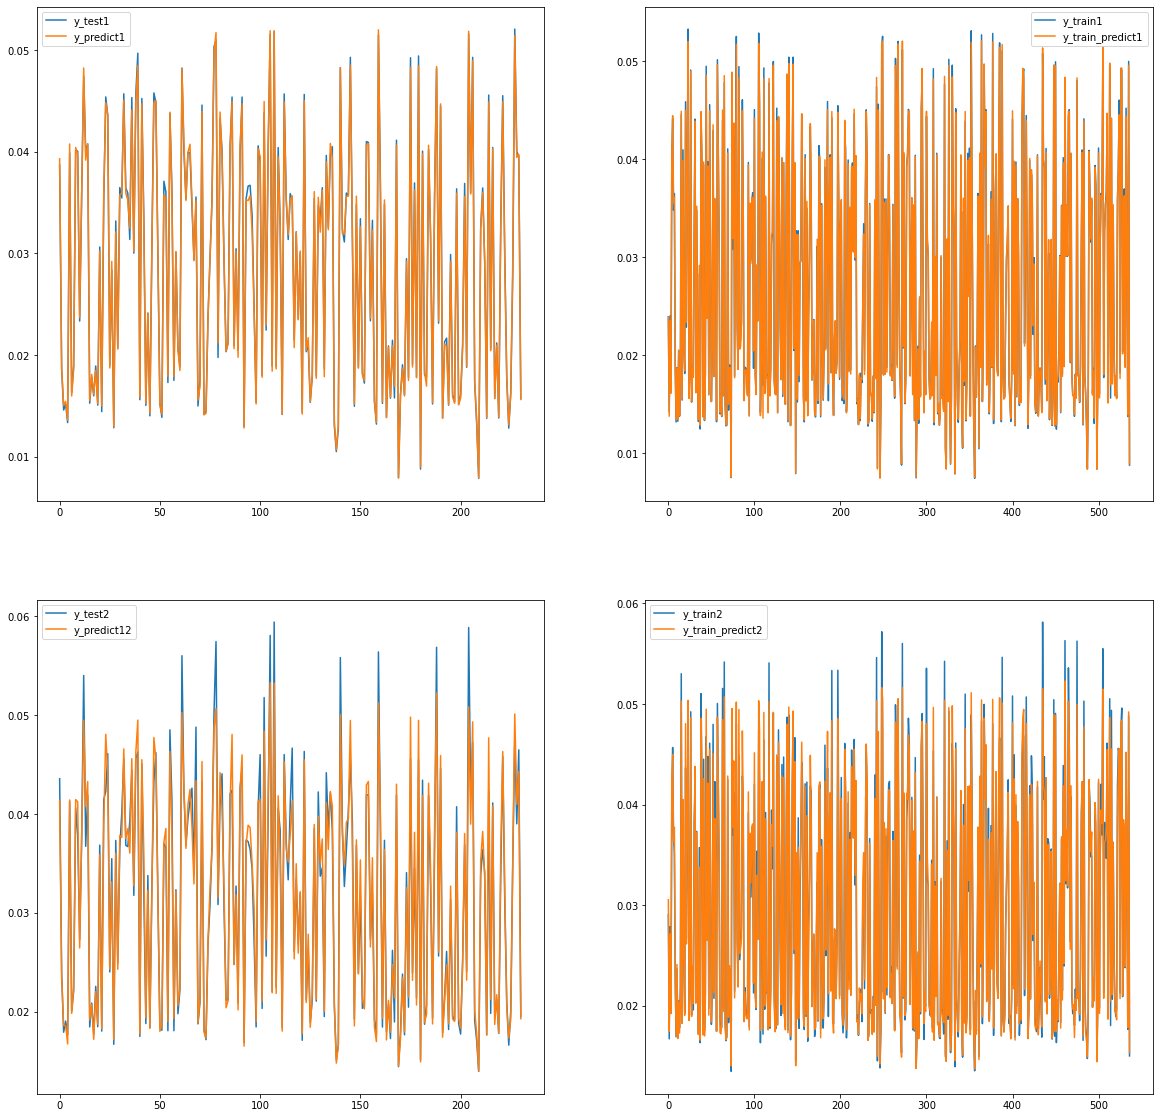

In [261]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))
ax1.plot(range(len(y_test)), [y[0] for y in y_test], label="y_test1")
ax1.plot(range(len(y_predict1)), y_predict1, label='y_predict1')
ax1.legend()
ax2.plot(range(len(y_train)), [y[0] for y in y_train], label="y_train1")
ax2.plot(range(len(y_train_predict1)), y_train_predict1, label="y_train_predict1")
ax2.legend()
ax3.plot(range(len(y_test)), [y[1] for y in y_test], label="y_test2")
ax3.plot(range(len(y_predict2)), y_predict2, label='y_predict12')
ax3.legend()
ax4.plot(range(len(y_train)), [y[1] for y in y_train], label="y_train2")
ax4.plot(range(len(y_train_predict2)), y_train_predict2, label="y_train_predict2")
ax4.legend()

## Графики стали ещё более похожими

# Линейный метод опорных векторов

In [262]:
from sklearn.svm import LinearSVR

model1 = LinearSVR()
model1.fit(X_train, [y[0] for y in y_train])
y_predict1 = model1.predict(X_test)
y_train_predict1 = model1.predict(X_train)

/Users/in7erval/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [263]:
print("---- Предсказание Y1 ----")
print(f'Score для тестовой выборки: {model2.score(X_train, [y[0] for y in y_train])}')
print(f'Score для тренировочной выборки: {model2.score(X_test, [y[0] for y in y_test])}')
print(f'RMSE для тестовой выборки: {sqrt(mean_squared_error([y[0] for y in y_test], y_predict1))}')
print(f'RMSE для тренировочной выборки: {sqrt(mean_squared_error([y[0] for y in y_train], y_train_predict1))}')
print(f'Коэффициент детерминации для тестовой выборки: {abs(r2_score([y[0] for y in y_test], y_predict1))}')
print(f'Коэффициент детерминации для тренировочной выборки: {abs(r2_score([y[0] for y in y_train], y_train_predict1))}')

---- Предсказание Y1 ----
Score для тестовой выборки: 0.9239660792433112
Score для тренировочной выборки: 0.9264728900770467
RMSE для тестовой выборки: 0.005519992316934998
RMSE для тренировочной выборки: 0.005815329731786539
Коэффициент детерминации для тестовой выборки: 0.7856464757255769
Коэффициент детерминации для тренировочной выборки: 0.7886161467781665


In [264]:
model2 = LinearSVR()
model2.fit(X_train, [y[1] for y in y_train])
y_predict2 = model2.predict(X_test)
y_train_predict2 = model2.predict(X_train)

/Users/in7erval/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [265]:
print("---- Предсказание Y2 ----")
print(f'Score для тестовой выборки: {model2.score(X_train, [y[0] for y in y_train])}')
print(f'Score для тренировочной выборки: {model2.score(X_test, [y[0] for y in y_test])}')
print(f'RMSE для тестовой выборки: {sqrt(mean_squared_error([y[1] for y in y_test], y_predict2))}')
print(f'RMSE для тренировочной выборки: {sqrt(mean_squared_error([y[1] for y in y_train], y_train_predict2))}')
print(f'Коэффициент детерминации для тестовой выборки: {abs(r2_score([y[1] for y in y_test], y_predict2))}')
print(f'Коэффициент детерминации для тренировочной выборки: {abs(r2_score([y[1] for y in y_train], y_train_predict2))}')

---- Предсказание Y2 ----
Score для тестовой выборки: 0.7648268523631343
Score для тренировочной выборки: 0.7685991100864175
RMSE для тестовой выборки: 0.00579036787150896
RMSE для тренировочной выборки: 0.005564784629383184
Коэффициент детерминации для тестовой выборки: 0.7426586785120171
Коэффициент детерминации для тренировочной выборки: 0.7798022278322991


## Среднеквадратическая ошибка намного, чем у при линейной регрессии, и, соответственно выше коэффициент детерминации. Плохо!!!1

## Строим графики

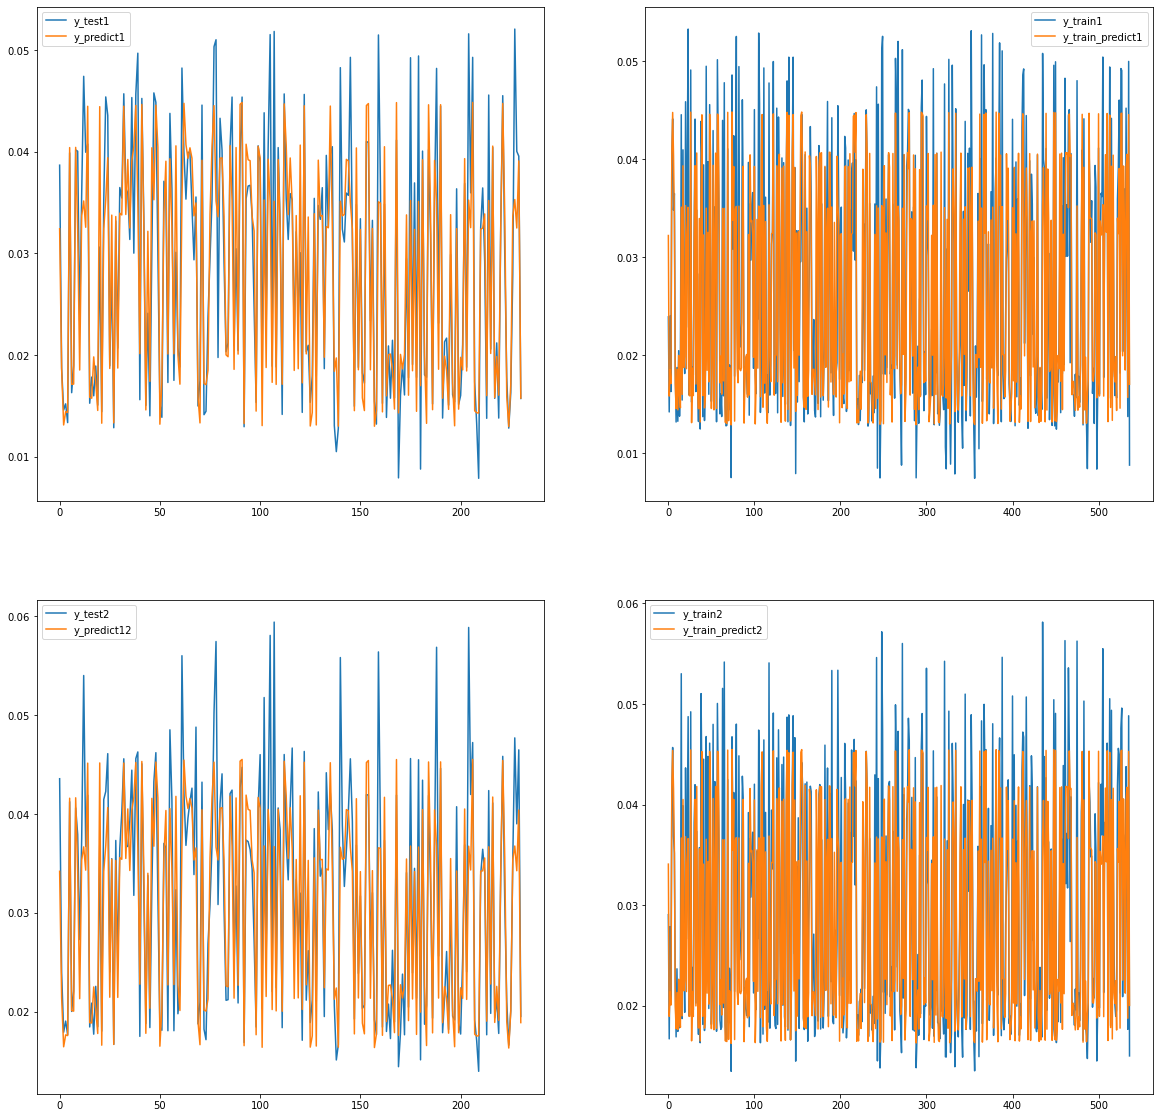

In [266]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))
ax1.plot(range(len(y_test)), [y[0] for y in y_test], label="y_test1")
ax1.plot(range(len(y_predict1)), y_predict1, label='y_predict1')
ax1.legend()
ax2.plot(range(len(y_train)), [y[0] for y in y_train], label="y_train1")
ax2.plot(range(len(y_train_predict1)), y_train_predict1, label="y_train_predict1")
ax2.legend()
ax3.plot(range(len(y_test)), [y[1] for y in y_test], label="y_test2")
ax3.plot(range(len(y_predict2)), y_predict2, label='y_predict12')
ax3.legend()
ax4.plot(range(len(y_train)), [y[1] for y in y_train], label="y_train2")
ax4.plot(range(len(y_train_predict2)), y_train_predict2, label="y_train_predict2")
ax4.legend()

## График для Y1 очень похож, но Y2 слабо похож

# Случайный лес

In [267]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor()
model1.fit(X_train, [y[0] for y in y_train])
y_predict1 = model1.predict(X_test)
y_train_predict1 = model1.predict(X_train)

In [268]:
print("---- Предсказание Y1 ----")
print(f'Score для тестовой выборки: {model2.score(X_train, [y[0] for y in y_train])}')
print(f'Score для тренировочной выборки: {model2.score(X_test, [y[0] for y in y_test])}')
print(f'RMSE для тестовой выборки: {sqrt(mean_squared_error([y[0] for y in y_test], y_predict1))}')
print(f'RMSE для тренировочной выборки: {sqrt(mean_squared_error([y[0] for y in y_train], y_train_predict1))}')
print(f'Коэффициент детерминации для тестовой выборки: {abs(r2_score([y[0] for y in y_test], y_predict1))}')
print(f'Коэффициент детерминации для тренировочной выборки: {abs(r2_score([y[0] for y in y_train], y_train_predict1))}')

---- Предсказание Y1 ----
Score для тестовой выборки: 0.7648268523631343
Score для тренировочной выборки: 0.7685991100864175
RMSE для тестовой выборки: 0.0006393203657599368
RMSE для тренировочной выборки: 0.00025122779870445113
Коэффициент детерминации для тестовой выборки: 0.9971246497095462
Коэффициент детерминации для тренировочной выборки: 0.9996054895538202


In [269]:
model2 = RandomForestRegressor()
model2.fit(X_train, [y[1] for y in y_train])
y_predict2 = model2.predict(X_test)
y_train_predict2 = model2.predict(X_train)

In [270]:
print("---- Предсказание Y2 ----")
print(f'Score для тестовой выборки: {model2.score(X_train, [y[0] for y in y_train])}')
print(f'Score для тренировочной выборки: {model2.score(X_test, [y[0] for y in y_test])}')
print(f'RMSE для тестовой выборки: {sqrt(mean_squared_error([y[1] for y in y_test], y_predict2))}')
print(f'RMSE для тренировочной выборки: {sqrt(mean_squared_error([y[1] for y in y_train], y_train_predict2))}')
print(f'Коэффициент детерминации для тестовой выборки: {abs(r2_score([y[1] for y in y_test], y_predict2))}')
print(f'Коэффициент детерминации для тренировочной выборки: {abs(r2_score([y[1] for y in y_train], y_train_predict2))}')

---- Предсказание Y2 ----
Score для тестовой выборки: 0.9160238693611675
Score для тренировочной выборки: 0.9182505036484386
RMSE для тестовой выборки: 0.00240889076193215
RMSE для тренировочной выборки: 0.000761394261874906
Коэффициент детерминации для тестовой выборки: 0.9554619265711833
Коэффициент детерминации для тренировочной выборки: 0.9958777398290815


## Ошибки очень маленькие, супер!! Случайный лес -- круто

 ## Строим графики

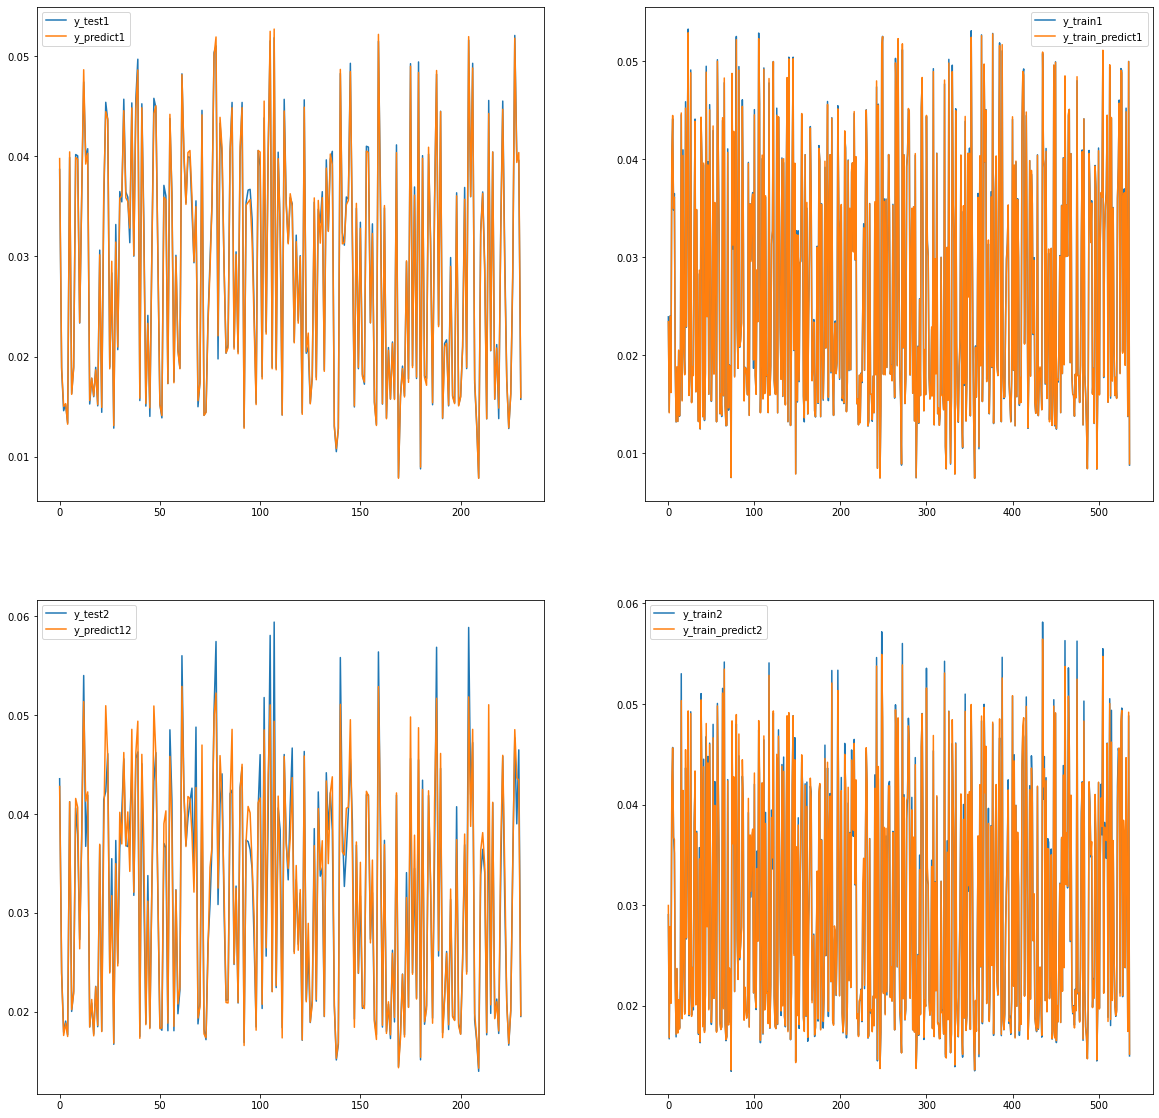

In [271]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))
ax1.plot(range(len(y_test)), [y[0] for y in y_test], label="y_test1")
ax1.plot(range(len(y_predict1)), y_predict1, label='y_predict1')
ax1.legend()
ax2.plot(range(len(y_train)), [y[0] for y in y_train], label="y_train1")
ax2.plot(range(len(y_train_predict1)), y_train_predict1, label="y_train_predict1")
ax2.legend()
ax3.plot(range(len(y_test)), [y[1] for y in y_test], label="y_test2")
ax3.plot(range(len(y_predict2)), y_predict2, label='y_predict12')
ax3.legend()
ax4.plot(range(len(y_train)), [y[1] for y in y_train], label="y_train2")
ax4.plot(range(len(y_train_predict2)), y_train_predict2, label="y_train_predict2")
ax4.legend()